In [1]:
import numpy as np
import pandas as pd

data_606 = pd.read_csv('606sets.csv', index_col=False)
data_acsf = pd.read_csv('acsf20new1.csv')

data_ALL = data_606.join(data_acsf)
data_ALL.head(2)

,ID,Formula,order,d,TM-atom,CO-atom,Spin-Magmom,TM-IonicRadius,CO-IonicRadius,Sum-IonicRadius,...,ACSF_11,ACSF_12,ACSF_13,ACSF_14,ACSF_15,ACSF_16,ACSF_17,ACSF_18,ACSF_19,ACSF_20
0,4,Fe4S8,1,6,Fe,S,4.898979,63.0,184.0,247.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11,Ca2Mn2Si2,0,5,Mn,Si,5.916080,66.0,26.0,92.0,...,0.339,1.452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [3]:
y = data_ALL['order'].values
excluded = ['ID', 'Formula', 'order', 'TM-atom', 'CO-atom']
X = data_ALL.drop(excluded, axis = 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    test_size = 0.2,
                                                    random_state = 28)

In [5]:
model_rfc = RandomForestClassifier(n_estimators = 300, max_features ='sqrt', random_state=30)
model_rfc.fit(X_train, y_train)
model_rfc.score(X_test, y_test)

0.9016393442622951

In [6]:
y_train_dummy = pd.get_dummies(y_train)
y_train_dummy
y_train_dummy = y_train_dummy.iloc[:, 1]
y_train_dummy.head(5)

0    0
1    1
2    0
3    0
4    0
Name: 1, dtype: uint8

In [7]:
#param_grid = {'n_estimators':(300, 400, 500),
#              'max_features': range(15, 25),
#              'min_samples_split': (2, 3, 4)}
#kfold = StratifiedKFold(n_splits = 10, shuffle=True,
#                        random_state = 1)
#model_kf = GridSearchCV(RandomForestClassifier(random_state = 321),
#                     param_grid, cv = kfold)

In [8]:
#model_kf.fit(X_train, y_train_dummy)

In [9]:
#model_kf.best_params_

In [10]:
#model_kf.best_score_

In [11]:
#model_kf.best_estimator_

In [12]:
model_rfc = RandomForestClassifier(n_estimators=500, 
                                   random_state = 343,
                                   max_features = 15, 
                                   min_samples_split = 2)

model_rfc.fit(X_train, y_train_dummy)
model_rfc.score(X_test, y_test)

0.9180327868852459

In [13]:
model_rfc.feature_importances_

array([6.29454059e-03, 5.44768361e-03, 7.09780491e-03, 1.80234920e-01,
       3.18966175e-01, 7.07353566e-03, 1.33653724e-02, 2.54218751e-02,
       1.23304402e-02, 3.71211746e-02, 1.20006305e-02, 5.01521138e-03,
       8.98420870e-02, 4.34637434e-02, 5.19317221e-03, 3.28132470e-02,
       1.30570062e-02, 9.51604784e-03, 1.75770022e-02, 1.93488973e-02,
       1.50733956e-02, 1.13250001e-02, 1.27574034e-02, 1.84981725e-02,
       1.55030321e-02, 1.10558702e-02, 1.49296222e-02, 1.31071266e-02,
       9.89284434e-03, 3.22142109e-03, 4.46282347e-03, 8.43297853e-03,
       1.24288194e-04, 8.64629781e-05, 1.72162682e-04, 1.76829028e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

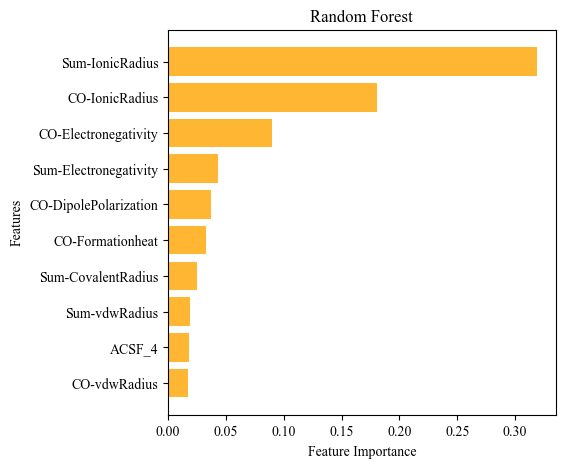

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman']
sorted_index = model_rfc.feature_importances_.argsort()
plt.figure(figsize = (5, 5))
plt.barh(range(10),
         model_rfc.feature_importances_[sorted_index][-10:],
         color='orange', alpha = 0.8)
plt.yticks(np.arange(10), X.columns[sorted_index][-10:])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest')
plt.savefig('featuremodel2.png', dpi = 300, bbox_inches='tight')
#plt.show()

In [16]:
y_pred = model_rfc.predict(X_test)
y_pred.shape

(122,)

[[46  4]
 [ 6 66]]


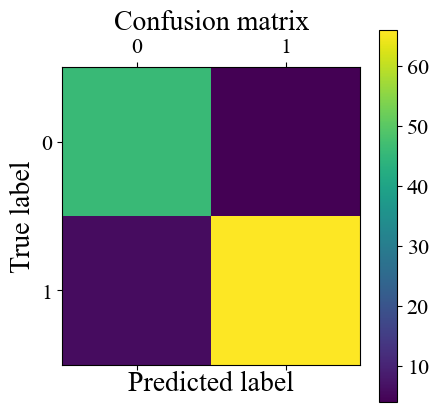

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman']
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix',fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.ylabel('True label', fontsize = 20)
plt.xlabel('Predicted label',fontsize = 20)
plt.savefig('c4.png', dpi = 300)
#plt.show()

In [18]:
#from sklearn.inspection import plot_partial_dependence
table = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
table

Predicted,0,1
Actual,,
0,46,4
1,6,66


In [19]:
table = np.array(table)
Accuracy = (table[0, 0] + table[1,1]) /np.sum(table)
Accuracy

0.9180327868852459

In [20]:
Precision = table[1, 1]/(table[1, 1]+table[0, 1])
print('Precision:', Precision.round(3))

Sensitivity = table[1, 1]/(table[1, 0] + table[1,1])
print(Sensitivity.round(3))

Specificity = table[0, 0] /(table[0,0] + table[0, 1])
print(Specificity)

Recall = table[1, 1] /(table[0, 1] + table[1,1])
print(Recall)

cohen_kappa_score(y_test, y_pred)

Precision: 0.943
0.917
0.92
0.9428571428571428


0.8315847598012148

In [21]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred)) 

0.9295774647887323


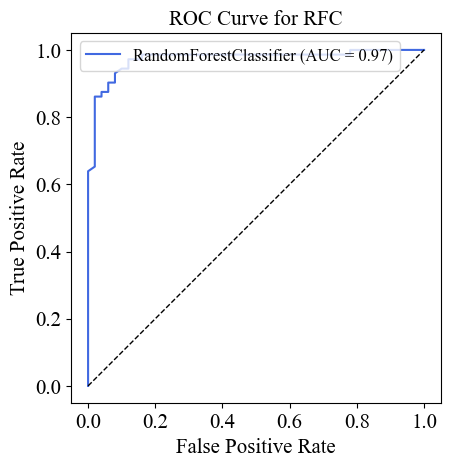

In [22]:
from sklearn.metrics import RocCurveDisplay
plt.rcParams['font.sans-serif']=['Times New Roman']

RocCurveDisplay.from_estimator(model_rfc, X_test, y_test, color = 'royalblue')
x = np.linspace(0, 1, 100)
plt.plot(x, x, 'k--', linewidth = 1)
plt.title('ROC Curve for RFC', fontsize = 15)
plt.axis('square')
plt.xlim()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate',fontsize = 15)
fontdict = {'family': 'Times New Roman',
            'size': 12}
            #'style': 'italic'}
plt.legend(prop=fontdict, loc = 'upper left')
plt.savefig('r4.png', dpi = 300)
#plt.show()